In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset =pd.read_csv(r"IRIS.csv")
dataset.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
dataset.shape

(150, 6)

In [5]:
dataset.notnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
145,True,True,True,True,True,True
146,True,True,True,True,True,True
147,True,True,True,True,True,True
148,True,True,True,True,True,True


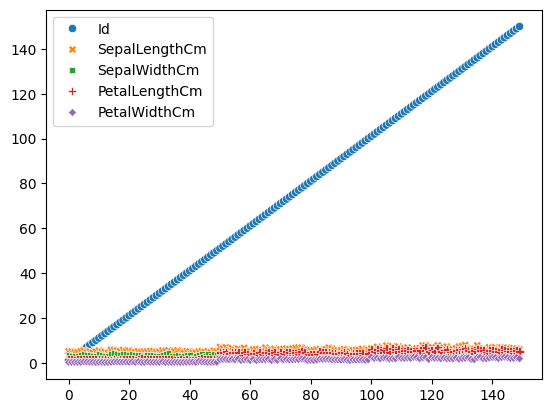

In [18]:
sns.scatterplot(data=dataset)
plt.show()

In [6]:
x = dataset.iloc[:,:-1]
y = dataset["Species"]

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(x)
x =pd.DataFrame(sc.transform(x),columns=x.columns)

In [9]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956
146,1.651258,0.553333,-1.281972,0.705893,0.922064
147,1.674353,0.795669,-0.124958,0.819624,1.053537
148,1.697448,0.432165,0.800654,0.933356,1.447956


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=52,test_size=0.2)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
knn.score(x_test,y_test)*100

100.0

In [15]:
knn.score(x_train,y_train)*100

99.16666666666667

In [16]:
knn.predict([[1.628164 ,1.038005 ,-0.124958 ,0.819624 ,1.447956]])

C:\Users\roysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [27]:
 y_pred = knn.predict(x_test)

In [28]:
 from sklearn.metrics import classification_report,confusion_matrix
 print("Report:\n",classification_report(y_test,y_pred))
 confusion_matrix(y_test, y_pred)
 print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[ 7  0  0]
 [ 0  9  0]
 [ 0  0 14]]


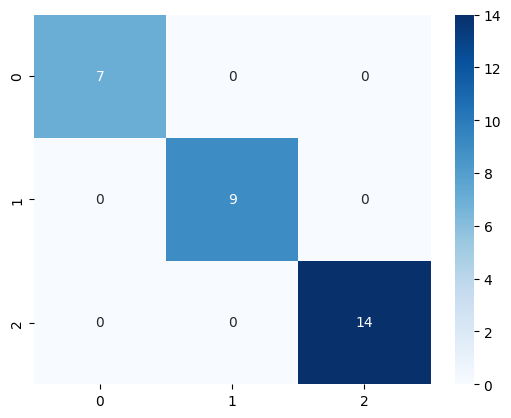

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.show()